


<center><b>© Content is made available under the CC-BY-NC-ND 4.0 license. Christian Lopez, lopezbec@lafayette.edu <b><center>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/lopezbec/intro_python_notebooks/blob/master/Classification_L2NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>

# Implementing a Two Layer Neural Network for Classification

This Notebook will give you an introduction to Neural Networks by implementing a Neural Network with two layers (L=2). You will build a NN for a binary classification problem and implement it in a set of simulated datasets with two features to help visualize the difference of NN compared to Logistic Regression. This assignment will step you through how to do the forward and backward propagation steps to train a Neural Network.
<br></br>

**In this Notebook  you will learn:**
- Implement a 2-class classification neural network with a single hidden layer
- Use neurons with a non-linear activation function, such as tanh
- Compute the cross entropy loss
- Implement forward and backward propagation steps
<br></br>

Most of the notebooks we are going to be using are inspired from existing notebooks that are available online and are made  free for educational purposes. The work of [Andre Ng]( https://en.wikipedia.org/wiki/Andrew_Ng)  and others served as guide and  inspiration for these notebooks. Nonetheless, these notebooks should not be share without prior permission of the instructor. When working in an assignment always remember the [Student Code of Conduct]( https://conduct.lafayette.edu/student-handbook/student-code-of-conduct/).  
</br>



#Setup


In [ ]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from scipy.special import expit, logit


%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## Dataset


Let’s generate some data to use in this notebook. At the end of the notebook you will be able to test your functions using other simulated datasets.

In [ ]:
np.random.seed(1)
m = 400 # number of examples
N = int(m/2) # number of points per class
D = 2 # dimensionality
X = np.zeros((m,D)) # data matrix where each row is a single example
Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
a = 4 # maximum ray of the flower

for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    Y[ix] = j


Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.

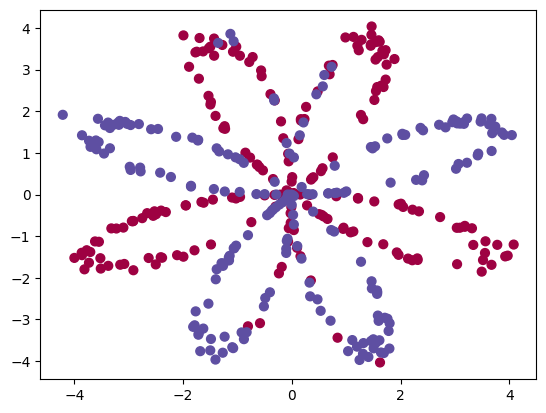

In [ ]:
# Visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=Y[:,0], s=40, cmap=plt.cm.Spectral);

This dataset has:

- X: a numpy-array (matrix) with dimension (m x n) that contains your features (x1, x2)
- Y: a numpy-array ( column vector) with dimension (m x 1) that contains your labels (red:0, blue:1).

Lets check these dimensions



#### **Exercise**:

Some of the most common bugs when implementing NN (forwards and backwards propagation steps) has to do with issues with np.arrays dimensions. Due to the broadcasting feature of python, the fact that a line of code does not give you an error, does not mean it is correct. Hence, you need to always know:

How many training examples do you have? In addition, what is the `shape` of the variables `X` and `Y`? What are the values of $n^{[0]}$,$n^{[1]}$,...,$n^{[L]}$?   


In [ ]:
###==== START CODE HERE ====### (≈ 5 lines of code)







###==== END CODE HERE ====###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('m = %d training examples!' % (m))
print ('n_0 =' + str(n_0))
print ('n_2 =' + str(n_2))

The shape of X is: (400, 2)
The shape of Y is: (400, 1)
m = 400 training examples!
n_0 =2
n_2 =1


**Expected Output**:
       
```
The shape of X is: (400, 2)
The shape of Y is: (400, 1)
m = 400 training examples!
n_0 =2
n_2 =1
```

## 1 - Simple Logistic Regression with sklearn

Before building a full neural network, lets first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [ ]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, Y.reshape(-1,)) #the reshape part is because sklearn lines Y to be an (m,) vector, if you pass a (m,1) array still will work but with a warning

LogisticRegressionCV()

You can now plot the decision boundary of these models. Run the code below.

<ipython-input-6-56271345eab5>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(LR_predictions,Y) + np.dot(1-LR_predictions, 1-Y))/float(Y.size)*100) +


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


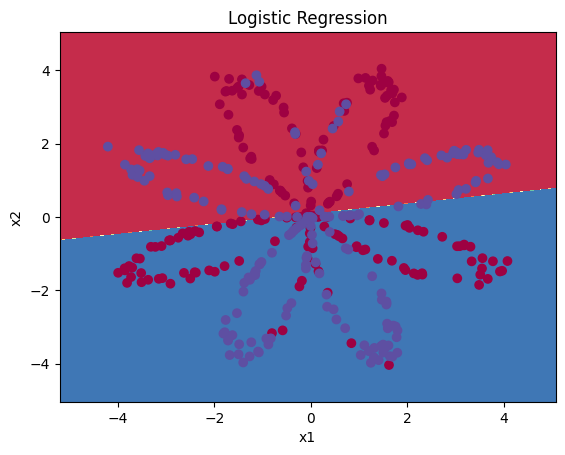

In [ ]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y[:,0])
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X)
print ('Accuracy of logistic regression: %d ' % float((np.dot(LR_predictions,Y) + np.dot(1-LR_predictions, 1-Y))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

 **Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now!

Even fitting more complex Logistic Regression Models (i.e., increasing the degree of polynomial does not helps that much)

Accuracy of logistic regression: 20 % (percentage of correctly labelled datapoints)


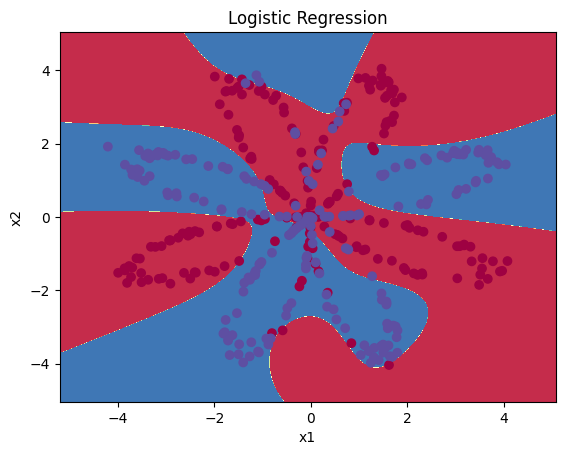

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Degree_of_Polynomial=10 #@param {type:"integer",step:0.5}

polybig_features = PolynomialFeatures(degree=Degree_of_Polynomial, include_bias=False)
std_scaler = StandardScaler()
LogCV = sklearn.linear_model.LogisticRegressionCV()

clf = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("LogCV", LogCV),
    ])

clf.fit(X, Y)

# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y[:,0])
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X)
print ('Accuracy of logistic regression: %d ' % float((np.dot(LR_predictions,Y) + np.dot(1-LR_predictions, 1-Y))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

## 1 - Neural Network model


Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

**Here is our model**:

**Mathematically**:

For one example $x^{(i)}$:


$$z^{[1] (i)} =  x^{(i)} W^{[1]}  + b^{[1]}\tag{1}$$
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = a^{[1] (i)} W^{[2]}  + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows:
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$



The general methodology to build a Neural Network is to:
1. Define the neural network structure ( # of input units,  # of hidden units, etc).
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

### 1.1 - Defining the neural network structure ####

####**Exercise**:



Define three variables:
- n_0: the size of the input layer
- n_1: the size of the hidden layer (set this to 4)
- n_2: the size of the output layer

**Hint**: Use shapes of X and Y to find n_0 and n_2. Also, hard code the hidden layer size to be 4.

In [ ]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ###==== START CODE HERE ====### (≈ 3 lines of code)




    ###==== END CODE HERE ====###
    return (n_0, n_1, n_2)

In [ ]:
n_0, n_1, n_2 = layer_sizes(X, Y)
print("The size of the input layer is: n_0 = " + str(n_0))
print("The size of the hidden layer is: n_1 = " + str(n_1))
print("The size of the output layer is: n_2 = " + str(n_2))

The size of the input layer is: n_0 = 2
The size of the hidden layer is: n_1 = 4
The size of the output layer is: n_2 = 1


**Expected Output**

*(these are not the sizes you will use for your network, they are just used to assess the function you've just coded)*

```
The size of the input layer is: n_0 = 2
The size of the hidden layer is: n_1 = 4
The size of the output layer is: n_2 = 1
```



### 1.2 - Initialize the model's parameters ####



####**Exercise**:

 Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes/shapes are right.
- You will initialize the weights matrices with random values.
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros.
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [ ]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_0, n_1, n_2):
    """
    Argument:
    n_0 -- size of the input layer
    n_1 -- size of the hidden layer
    n_2 -- size of the output layer

    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_1, n_0)
                    b1 -- bias vector of shape (n_1, 1)
                    W2 -- weight matrix of shape (n_2, n_1)
                    b2 -- bias vector of shape (n_2, 1)
    """

    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    ###==== START CODE HERE ====### (≈ 4 lines of code)






    ###==== END CODE HERE ====###


    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [ ]:
parameters = initialize_parameters(n_0, n_1, n_2)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


**Expected Output**:



```
W1 = [[-0.00416758 -0.00056267]
     [-0.02136196  0.01640271]
     [-0.01793436 -0.00841747]
     [ 0.00502881 -0.01245288]]
b1 = [[0.]
     [0.]
     [0.]
     [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]
```




### 1.3 - The Loop ####


#### 1.3.1 - Forward Propagation ####



##### **Exercise**:


Implement `forward_propagation()`.

**Instructions**:
- Look above at the mathematical representation of your classifier.
- You can use the function `expit()` for Scipy for the sigmoid activation function.
- You can use the function `np.tanh()` for the tanh activation function. It is part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using for example `parameters["W1"]` to get $W^{[1]}$.
    2. Implement Forward Propagation. Compute:
$Z^{[1]}$, $A^{[1]}$, $Z^{[2]}$ and $A^{[2]}$
(the vector of all your predictions on all the examples in the training set).

- Values needed in the backpropagation are stored in "`cache`". The `cache` dictionary will be given as an input to the backpropagation function.

In [ ]:
# GRADED FUNCTION: forward_propagation
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (m, n_0)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """

    ###==== START CODE HERE ====### (≈ 8 lines of code)








    ###==== END CODE HERE ====###


    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [ ]:
def forward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3).T
    b1 = np.random.randn(1,4).T
    b2 = np.array([[ -1.3]])

    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': b1,
     'b2': b2}

    return X_assess, parameters

X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours.
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


**Expected Output**:
<table style="width:50%">
  <tr>
    <td> 0.262818640198 0.091999045227 -1.30766601287 0.212877681719 </td>
  </tr>
</table>

#### 1.3.2 Commpute Cost

Now that you have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\$$



##### **Exercise**:

Implement `compute_cost()` to compute the value of the cost $J$.


*There are many ways to implement the cross-entropy loss (vectorized, non-vectorized, one or multiple lines or code). You can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`.  

Note that if you use `np.multiply` followed by `np.sum` the end result will be a type `float`, whereas if you use `np.dot`, the result will be a 2D numpy array.

  We can use `np.squeeze()` to remove redundant dimensions (in the case of single float, this will be reduced to a zero-dimension array). We can cast the array as a type `float` using `float()`.

In [ ]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)

    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (n_2, number of examples)
    Y -- "true" labels vector of shape (number of examples, n_2)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2

    Returns:
    cost -- cross-entropy cost given equation

    """

    m = Y.shape[0] # number of example

    # Compute the cross-entropy cost
    ###==== START CODE HERE ====### (≈ 1 lines of code)






    ###==== END CODE HERE ====###



    return cost

In [ ]:
def compute_cost_test_case():
    np.random.seed(1)
    Y_assess = (np.random.randn(3, 1) > 0)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    a2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))

    return a2, Y_assess, parameters


A2, Y_assess, parameters = compute_cost_test_case()
print("cost = " + str(compute_cost(A2, Y_assess)))

cost = 0.6930587610394646


**Expected Output**:


```
cost = 0.6930587610394646
```



#### 1.3.3 Backward Propagation

Using the cache computed during forward propagation, you can now implement backward propagation.

##### **Exercise**:



Implement the function `backward_propagation()`.

Backpropagation is usually the hardest (most mathematical) part in NN and Deep learning.

- To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [ ]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.

    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (number of examples, n_0)
    Y -- "true" labels vector of shape (number of examples, n_2)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[0]


    ### START CODE HERE ### (≈ 10 lines of code)











    ### END CODE HERE ###

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [ ]:
def backward_propagation_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3).T
    Y_assess = (np.random.randn(3, 1) > 0)
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
     'b2': np.array([[ 0.]])}

    cache = {'A1': np.array([[-0.00616578,  0.0020626 ,  0.00349619],
         [-0.05225116,  0.02725659, -0.02646251],
         [-0.02009721,  0.0036869 ,  0.02883756],
         [ 0.02152675, -0.01385234,  0.02599885]]),
  'A2': np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]),
  'Z1': np.array([[-0.00616586,  0.0020626 ,  0.0034962 ],
         [-0.05229879,  0.02726335, -0.02646869],
         [-0.02009991,  0.00368692,  0.02884556],
         [ 0.02153007, -0.01385322,  0.02600471]]),
  'Z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]])}
    return parameters, cache, X_assess, Y_assess

parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


**Expected output**:
```
dW1 = [[ 0.00301023 -0.00747267]
      [ 0.00257968 -0.00641288]
      [-0.00156892  0.003893  ]
      [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
      [ 0.00150995]
      [-0.00091736]
      [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]
```

#### 1.3.4 Parameter Update (Gradient Descent Step)

Now that we have the partial derivatives of our cost function with respect to our weights and bias, we can update them using gradient desce

##### **Exercise**:

 Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.




In [ ]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients

    Returns:
    parameters -- python dictionary containing your updated parameters
    """

    ###==== START CODE HERE ====### (≈ 12 lines of code)













    ###==== END CODE HERE ====###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [ ]:
def update_parameters_test_case():
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
 'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
 'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
 'b2': np.array([[  9.14954378e-05]])}

    grads = {'dW1': np.array([[ 0.00023322, -0.00205423],
        [ 0.00082222, -0.00700776],
        [-0.00031831,  0.0028636 ],
        [-0.00092857,  0.00809933]]),
 'dW2': np.array([[ -1.75740039e-05,   3.70231337e-03,  -1.25683095e-03,
          -2.55715317e-03]]),
 'db1': np.array([[  1.05570087e-07],
        [ -3.81814487e-06],
        [ -1.90155145e-07],
        [  5.46467802e-07]]),
 'db2': np.array([[ -1.08923140e-05]])}
    return parameters, grads

parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


**Expected Output**:

```
W1 = [[-0.00643025  0.01936718]
     [-0.02410458  0.03978052]
     [-0.01653973 -0.02096177]
     [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
     [ 1.27373948e-05]
     [ 8.32996807e-07]
     [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]
```

### 1.4 - Creating a Two Layer NN ####


Now that you have your Initialize model parameters, Forward Propagation, Cost, Backward Propagation, and Update functions, you can integrate them into a single function nn_model()

##### **Exercise**:

Build your neural network model in `nn_model()`. The neural network model has to use the previous functions in the right order.

In [ ]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_1, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape ( number of examples, n_0)
    Y -- labels of shape (number of examples, n_2)
    n_1 -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(3)

    ###==== START CODE HERE ====### (≈ 12 lines of code)









    ###==== END CODE HERE ====###

        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [ ]:
def nn_model_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3).T
    Y_assess = (np.random.randn(3, 1) > 0)
    return X_assess, Y_assess

X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.692739
Cost after iteration 1000: 0.000218
Cost after iteration 2000: 0.000107
Cost after iteration 3000: 0.000071
Cost after iteration 4000: 0.000053
Cost after iteration 5000: 0.000042
Cost after iteration 6000: 0.000035
Cost after iteration 7000: 0.000030
Cost after iteration 8000: 0.000026
Cost after iteration 9000: 0.000023
W1 = [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]
b1 = [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]]
W2 = [[-2.45566237 -3.27042274  2.00784958  3.36773273]]
b2 = [[0.20459656]]


**Expected Output**:



```
Cost after iteration 0: 0.692739
        .
        .
        .
Cost after iteration 9000: 0.000023
W1 = [[-0.65848169  1.21866811]
    [-0.76204273  1.39377573]
    [ 0.5792005  -1.10397703]
    [ 0.76773391 -1.41477129]]
b1 = [[ 0.287592  ]
    [ 0.3511264 ]
    [-0.2431246 ]
    [-0.35772805]]
W2 = [[-2.45566237 -3.27042274  2.00784958  3.36773273]]
b2 = [[0.20459656]]
```



#### 1.4.1 Predictions

Now that we can train our NN, we can use it to predict the expected class of a new instance.

##### **Exercise**:

Use your model to predict by building `predict()`.
Use forward propagation to predict results.

$y_{prediction} =  \begin{cases} 1 & \text{if}\ activation > 0.5 \\0 & \text{otherwise} \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [ ]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (m, n_0)

    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """


    ###==== START CODE HERE ===### (≈ 2 lines of code)



    ###=== END CODE HERE ===###

    return predictions

In [ ]:
def predict_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(2, 3).T
    parameters = {'W1': np.array([[-0.00615039,  0.0169021 ],
        [-0.02311792,  0.03137121],
        [-0.0169217 , -0.01752545],
        [ 0.00935436, -0.05018221]]),
     'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
     'b1': np.array([[ -8.97523455e-07],
        [  8.15562092e-06],
        [  6.04810633e-07],
        [ -2.54560700e-06]]),
     'b2': np.array([[  9.14954378e-05]])}
    return parameters, X_assess

parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(round(np.mean(predictions),4)))
print("predictions 1-3= " + str(predictions[0:2,:]))

predictions mean = 0.6667
predictions 1-3= [[ True False  True]]


**Expected Output**:

```
predictions mean = 0.6667
predictions 1-3= [[ True False  True]]
```

### 1.5 Testing our NN model

It is time to run the model and see how it performs on our "flower" dataset. Run the following code to test your model with a single hidden layer of $n^{[1]}$ hidden units.

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219459
Cost after iteration 9000: 0.218559


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

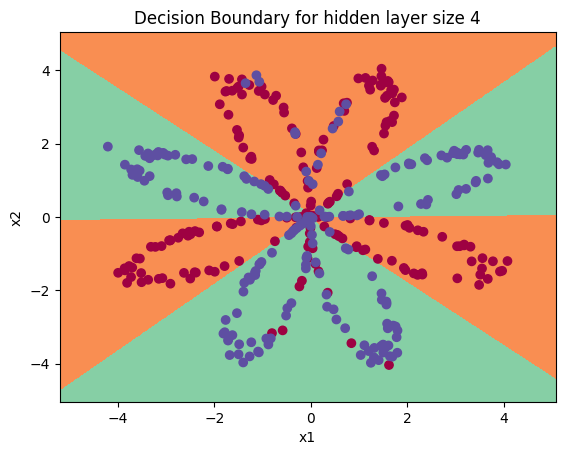

In [ ]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_1 = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x), X, Y[:,0])
plt.title("Decision Boundary for hidden layer size " + str(4))

In [ ]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(predictions,Y) + np.dot(1-predictions, 1-Y))/float(Y.size)*100) + '%')

Accuracy: 90%


Accuracy is really high compared to Logistic Regression. The model has learnt the leaf patterns of the flower! Neural networks are able to learn  highly non-linear decision boundaries, unlike logistic regression.

Now, let's try out several hidden layer sizes.

#### 1.5.1 - Tuning hidden layer size  ###

Run the following code. It may take 1-2 minutes. You will observe different behaviors of the model using NN with various hidden layer sizes.

Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %


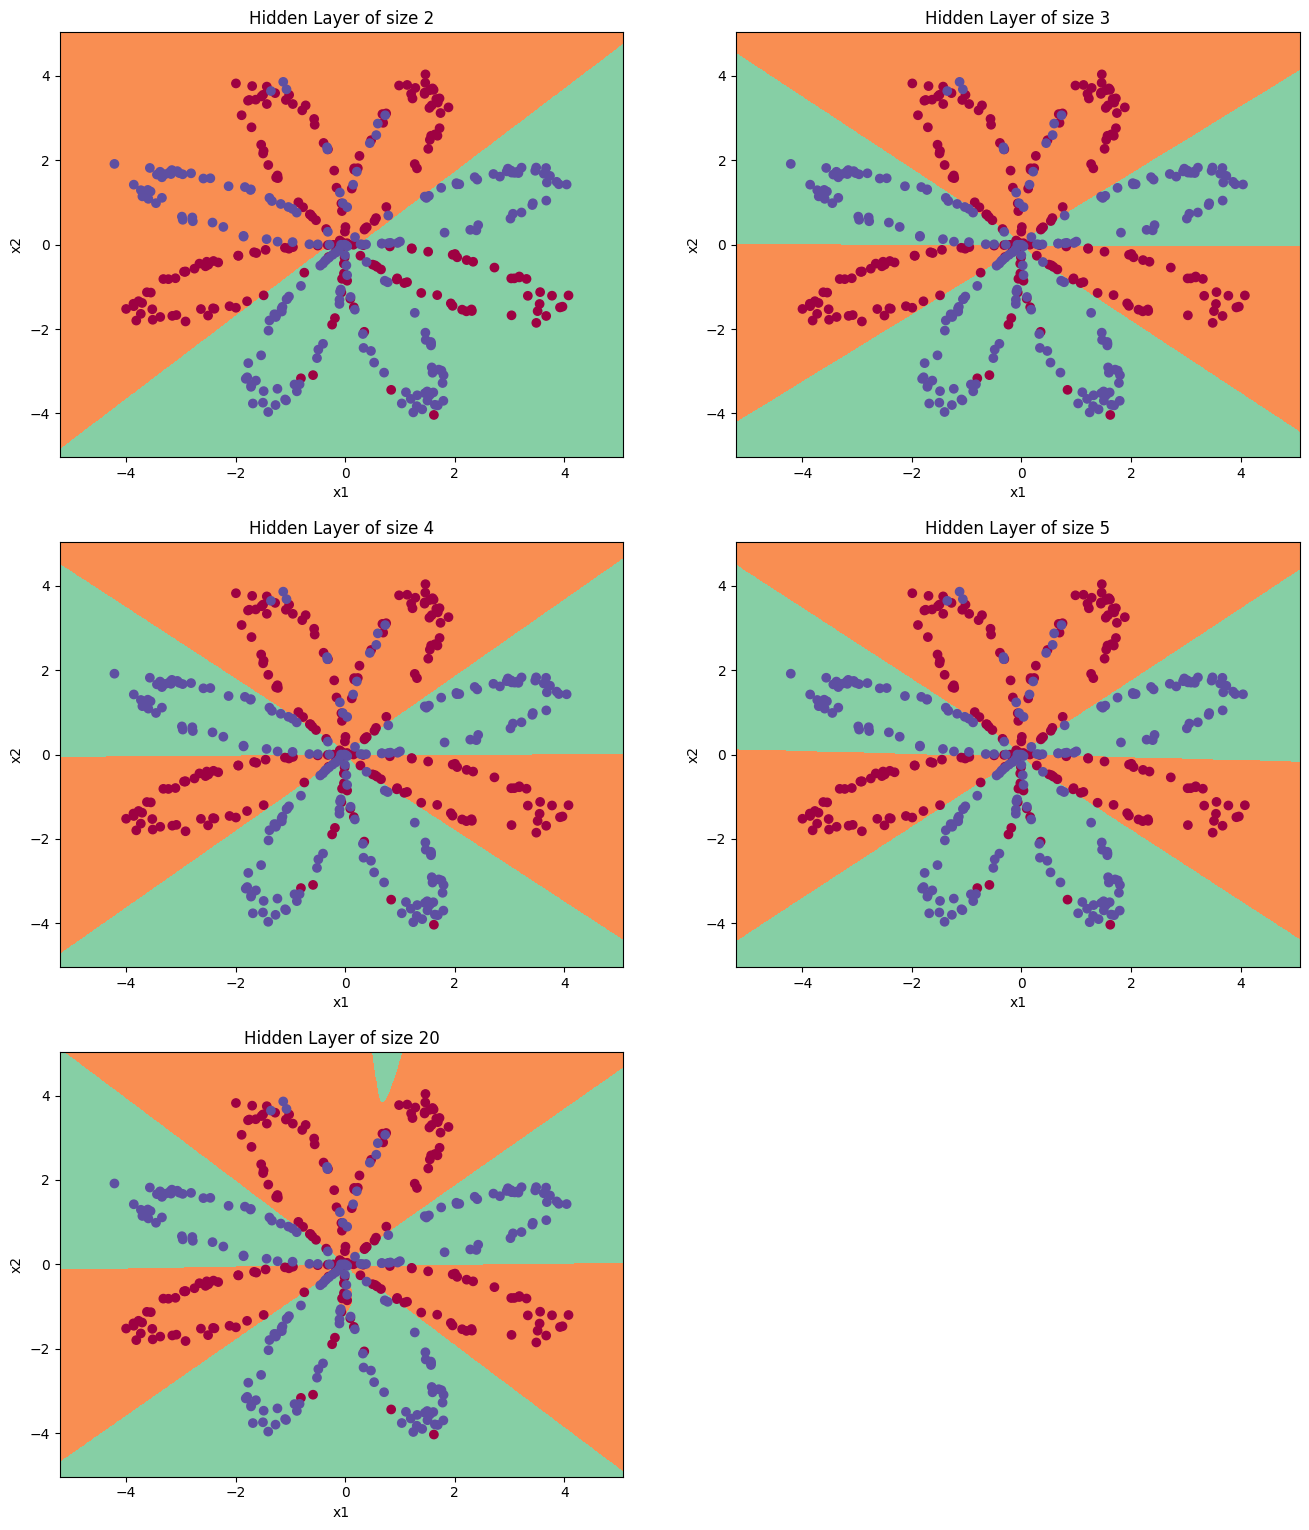

In [ ]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [2,3,4,5,20]
for i, n_1 in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_1)
    parameters = nn_model(X, Y, n_1, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x), X, Y[:,0])
    predictions = predict(parameters, X)
    accuracy = float((np.dot(predictions,Y) + np.dot(1-predictions,1-Y))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_1, accuracy))

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data.
- The best hidden layer size seems to be around n_1 = 5. Indeed, a value around here seems to  fits the data well without also incurring noticeable overfitting.
- You will also learn later about regularization in NN, which lets you use very large models (such as n_1 = 50) without much overfitting.

**Optional questions**:

Some optional/ungraded questions that you can explore if you wish:
- What happens when you change the tanh activation for a sigmoid activation or a ReLU activation?
- Play with the learning_rate. What happens?
- What if we change the dataset? (See part next section)


**You've learnt to:**
- Build a complete neural network with a hidden layer
- Make a good use of a non-linear unit
- Implemented forward propagation and backpropagation, and trained a neural network
- See the impact of varying the hidden layer size, including overfitting.

## 2- Performance on other datasets

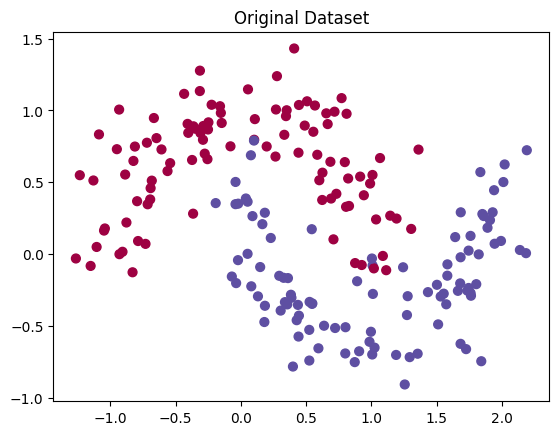

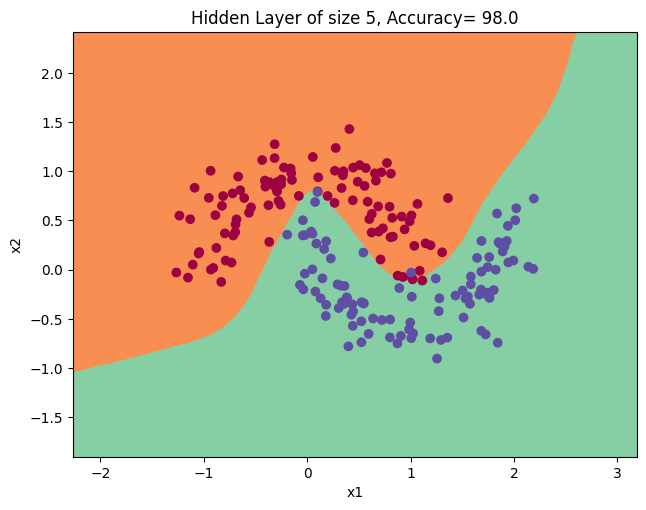

In [ ]:
def load_extra_datasets():
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)

    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure


# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = 'noisy_moons' #@param ["noisy_circles", "noisy_moons", "blobs", "gaussian_quantiles"]
### END CODE HERE ###

X, Y = datasets[dataset]
Y = Y.reshape(Y.shape[0],1)

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.title('Original Dataset' )
plt.scatter(X[:, 0], X[:, 1], c=Y[:,0], s=40, cmap=plt.cm.Spectral);


# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
n_1 =5 #@param {type:"integer",step:0.5}



parameters = nn_model(X, Y, n_1, num_iterations = 5000)
predictions = predict(parameters, X)
accuracy = float((np.dot(predictions,Y) + np.dot(1-predictions,1-Y))/float(Y.size)*100)


plt.subplot(5, 2, i+1)
plt.title('Hidden Layer of size {0}, Accuracy= {1}'.format(n_1, accuracy))
plot_decision_boundary(lambda x: predict(parameters, x), X, Y[:,0])


Reference:
- http://scs.ryerson.ca/~aharley/neural-networks/
- http://cs231n.github.io/neural-networks-case-study/

###### **DO NOT DELETE NOR MODIFY THESE CODE CELLS**


In [ ]:
!wget https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/GRADING_l2NN.py

# # ###DO NOT DELETE NOR MODIFY THIS CODE CELL####
from GRADING_l2NN import GRADING

try:
    layer_sizes
except:
    layer_sizes=None
try:
    initialize_parameters
except:
    initialize_parameters=None
try:
    forward_propagation
except:
    forward_propagation=None
try:
    compute_cost
except:
    compute_cost=None

try:
    backward_propagation
except:
    backward_propagation=None
try:
    update_parameters
except:
    update_parameters=None
try:
    nn_model
except:
    nn_model=None
try:
    predict
except:
    predict=None

GRADING(layer_sizes,initialize_parameters,forward_propagation,
        compute_cost,backward_propagation,update_parameters,
        nn_model,predict,forward_propagation_test_case,
        compute_cost_test_case,backward_propagation_test_case,
        update_parameters_test_case,nn_model_test_case,
        predict_test_case)




--2025-03-26 17:11:33--  https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/GRADING_l2NN.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3267 (3.2K) [text/plain]
Saving to: ‘GRADING_l2NN.py’

GRADING_l2NN.py     100%[===================>]   3.19K  --.-KB/s    in 0s      

2025-03-26 17:11:33 (32.5 MB/s) - ‘GRADING_l2NN.py’ saved [3267/3267]

layer_sizes : True
initialize_parameters : True
forward_propagation : True
compute_cost : True
backward_propagation : True
update_parameters : True
nn_model : True
predict : True
